# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [8]:
# 1. Import pandas as pd and numpy as np
import pandas as pd
import numpy as np

In [9]:
# 2. Print the version of pandas that has been imported.
print(pd.__version__)

2.3.1


In [10]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
data = pd.Series([10,20,30,40,50])
'data = pd.Series(data)'

'data = pd.Series(data)'

In [11]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
data_dict_DF = pd.DataFrame(data_dict)

In [12]:
# 5. Set the 'name' column as the index of the DataFrame created in Q4.
data_dict_DF = data_dict_DF.set_index(['name'])

---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [13]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo = pd.read_csv(url, sep='\t')

In [14]:
# 7. Show the first 10 entries of the dataframe.
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [15]:
# 8. What is the number of observations (rows) and columns in the dataset?
rows, cols = chipo.shape
print("Rows: ", rows)
print("Colunmns: ", cols)

Rows:  4622
Colunmns:  5


In [16]:
# 9. Print the name of all the columns.
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [17]:
# 10. How is the dataset indexed?
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [18]:
# 11. Check the data type of each column.
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [19]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.replace('$','',regex=False).astype(float)
chipo['item_price'].dtype

dtype('float64')

In [20]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [21]:
# 14. Drop any duplicate rows, if they exist.


In [22]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo = chipo.drop_duplicates()

---
## Section 4: Filtering & Sorting


In [23]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo = chipo.sort_values(by=['item_price'], ascending= False)

In [24]:
# 17. How many items cost more than $10.00?
count_10 = (chipo['item_price'] > 10).sum()
print(count_10)

1123


In [25]:
# 18. What is the price of each item? 
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
print(chipo[['item_name', 'item_price']].drop_duplicates())

                         item_name  item_price
3598  Chips and Fresh Tomato Salsa       44.25
3480                 Carnitas Bowl       35.25
3602               Chicken Burrito       35.00
3601                Veggie Burrito       33.75
409                   Chicken Bowl       32.94
...                            ...         ...
70                   Side of Chips        1.69
3460                 Bottled Water        1.50
4430             Canned Soft Drink        1.25
3793                   Canned Soda        1.09
34                   Bottled Water        1.09

[209 rows x 2 columns]


In [26]:
# 19. Select only the items where the name is 'Chicken Bowl'.
print(chipo[chipo['item_name'] == 'Chicken Bowl'])

      order_id  quantity     item_name  \
409        178         3  Chicken Bowl   
1514       616         3  Chicken Bowl   
1429       578         2  Chicken Bowl   
2510       997         2  Chicken Bowl   
4423      1764         2  Chicken Bowl   
...        ...       ...           ...   
2429       965         1  Chicken Bowl   
1796       726         1  Chicken Bowl   
2918      1160         1  Chicken Bowl   
3664      1466         1  Chicken Bowl   
3101      1237         1  Chicken Bowl   

                                     choice_description  item_price  
409   [[Fresh Tomato Salsa (Mild), Tomatillo-Green C...       32.94  
1514  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       26.25  
1429  [Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...       22.50  
2510  [Roasted Chili Corn Salsa, [Rice, Black Beans,...       22.50  
4423  [Fresh Tomato Salsa, [Rice, Fajita Vegetables,...       22.50  
...                                                 ...         ...  
2429 

In [27]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
print(chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] > 1)])

      order_id  quantity     item_name  \
409        178         3  Chicken Bowl   
1514       616         3  Chicken Bowl   
1429       578         2  Chicken Bowl   
2510       997         2  Chicken Bowl   
4423      1764         2  Chicken Bowl   
3843      1540         2  Chicken Bowl   
1832       741         2  Chicken Bowl   
2525      1004         2  Chicken Bowl   
3508      1410         2  Chicken Bowl   
2075       837         2  Chicken Bowl   
3151      1257         2  Chicken Bowl   
2942      1170         2  Chicken Bowl   
1017       418         2  Chicken Bowl   
976        401         2  Chicken Bowl   
3423      1374         2  Chicken Bowl   
154         70         2  Chicken Bowl   
1588       643         2  Chicken Bowl   
415        181         2  Chicken Bowl   
282        124         2  Chicken Bowl   
1106       457         2  Chicken Bowl   
2106       848         2  Chicken Bowl   
4435      1767         2  Chicken Bowl   
654        271         2  Chicken 

---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [51]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks = pd.read_csv(url_drinks)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [53]:
# 22. Which continent drinks more beer on average?
drinks1 = drinks.groupby('continent').agg(
    avg_beer_consume = ('beer_servings', 'mean')
).reset_index()

drinks1 = drinks1.sort_values(['avg_beer_consume'], ascending=False)
print(drinks1)

  continent  avg_beer_consume
2        EU        193.777778
4        SA        175.083333
3        OC         89.687500
0        AF         61.471698
1        AS         37.045455


In [55]:
# 23. For each continent, print the statistics for wine consumption.
wine_consumption = drinks.groupby('continent').agg(
    total_wine_consume = ('wine_servings', 'sum'),
    average_wine_consume = ('wine_servings', 'mean')
).reset_index()

wine_consumption = wine_consumption.sort_values(['average_wine_consume'], ascending=False)
print(wine_consumption)

  continent  total_wine_consume  average_wine_consume
2        EU                6400            142.222222
4        SA                 749             62.416667
3        OC                 570             35.625000
0        AF                 862             16.264151
1        AS                 399              9.068182


In [56]:
# 24. Print the mean alcohol consumption per continent for every column.
alcohol_consumption = drinks.groupby('continent').agg(
    mean_alcohol_consume = ('total_litres_of_pure_alcohol', 'mean')
).reset_index()

alcohol_consumption = alcohol_consumption.sort_values(['mean_alcohol_consume'], ascending=False)
print(alcohol_consumption)

  continent  mean_alcohol_consume
2        EU              8.617778
4        SA              6.308333
3        OC              3.381250
0        AF              3.007547
1        AS              2.170455


In [58]:
# 25. Print the median alcohol consumption per continent for every column.
alcohol_consumption = drinks.groupby('continent').agg(
    median_alcohol_consume = ('total_litres_of_pure_alcohol', 'median')
).reset_index()

alcohol_consumption = alcohol_consumption.sort_values(['median_alcohol_consume'], ascending=False)
print(alcohol_consumption)

  continent  median_alcohol_consume
2        EU                   10.00
4        SA                    6.85
0        AF                    2.30
3        OC                    1.75
1        AS                    1.20


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [59]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.

def price_lvl(price):
    return "High" if price > 10 else "Low"

chipo['price_level'] = chipo['item_price'].apply(price_lvl)
print(chipo.head())

      order_id  quantity                     item_name  \
3598      1443        15  Chips and Fresh Tomato Salsa   
3480      1398         3                 Carnitas Bowl   
3602      1443         4               Chicken Burrito   
1254       511         4               Chicken Burrito   
3601      1443         3                Veggie Burrito   

                                     choice_description  item_price  \
3598                                                NaN       44.25   
3480  [Roasted Chili Corn Salsa, [Fajita Vegetables,...       35.25   
3602  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       35.00   
1254  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       35.00   
3601  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       33.75   

     price_level  
3598        High  
3480        High  
3602        High  
1254        High  
3601        High  


In [62]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name'] = chipo['item_name'].apply(lambda x: x.upper())
print(chipo['item_name'])

3598    CHIPS AND FRESH TOMATO SALSA
3480                   CARNITAS BOWL
3602                 CHICKEN BURRITO
1254                 CHICKEN BURRITO
3601                  VEGGIE BURRITO
                    ...             
2520                     CANNED SODA
180                      CANNED SODA
179                      CANNED SODA
1290                     CANNED SODA
2981                   BOTTLED WATER
Name: item_name, Length: 4563, dtype: object


In [ ]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
print(chipo.iloc[10:21, 1:4])

      quantity         item_name  \
1514         3      CHICKEN BOWL   
3334         3        STEAK BOWL   
613          2  STEAK SALAD BOWL   
281          2  STEAK SALAD BOWL   
506          2     CARNITAS BOWL   
1753         2     STEAK BURRITO   
4427         2        STEAK BOWL   
3754         2        STEAK BOWL   
1566         2        STEAK BOWL   
4307         2        STEAK BOWL   
2954         2     STEAK BURRITO   

                                     choice_description  
1514  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...  
3334  [Tomatillo Green Chili (Medium), [Rice, Black ...  
613   [Tomatillo Red Chili Salsa, [Fajita Vegetables...  
281   [Tomatillo Red Chili Salsa, [Black Beans, Chee...  
506   [Roasted Chili Corn Salsa, [Fajita Vegetables,...  
1753  [Tomatillo Green Chili Salsa, [Fajita Vegetabl...  
4427  [Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...  
3754  [Tomatillo Red Chili Salsa, [Fajita Vegetables...  
1566  [Fresh Tomato Salsa, [Rice, Black Beans

---
## Section 7: Merging & Joining


In [70]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
df_merged = pd.merge(df1, df2, how='inner', on='ID')
print(df_merged.head())

   ID     Name  Score
0   2      Bob     85
1   3  Charlie     90


In [71]:
# 30. Merge them on 'ID' using an outer join.
df_merged = pd.merge(df1, df2, how='outer', on='ID')
print(df_merged.head())

   ID     Name  Score
0   1    Alice    NaN
1   2      Bob   85.0
2   3  Charlie   90.0
3   4      NaN   95.0


In [72]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
df_merged = pd.merge(df1, df2, how='left', on='ID')
print(df_merged.head())

   ID     Name  Score
0   1    Alice    NaN
1   2      Bob   85.0
2   3  Charlie   90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [74]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
df_date = pd.date_range('2023-01-01', '2023-01-10')
print(df_date)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


In [75]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
df_random = pd.DataFrame({
    'Sales': np.random.randint(100,500, size=len(df_date))
}, index = df_date)

print(df_random.head())

            Sales
2023-01-01    490
2023-01-02    176
2023-01-03    425
2023-01-04    309
2023-01-05    365


In [77]:
# 34. Resample the data to calculate the 3-day sum of sales.
three_day_sum = df_random.resample('3D').sum()
print(three_day_sum)

            Sales
2023-01-01   1091
2023-01-04    780
2023-01-07    528
2023-01-10    471


In [78]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).
df_random['Sales_lag_1'] = df_random['Sales'].shift(1)
print(df_random.head())

            Sales  Sales_lag_1
2023-01-01    490          NaN
2023-01-02    176        490.0
2023-01-03    425        176.0
2023-01-04    309        425.0
2023-01-05    365        309.0


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [79]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
titanic = pd.read_csv(url_titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# 37. How many passengers survived? (Survived=1)
survived_count = titanic['Survived'].sum()
print(survived_count)

342


In [83]:
# 38. What is the average age of passengers?
avg_passenger_age = titanic['Age'].mean()
print(avg_passenger_age)

29.69911764705882


In [85]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
survival_rate_df = titanic.groupby('Pclass').agg(
    survival_rate = ('Survived', 'mean')
).reset_index()

print(survival_rate_df)

   Pclass  survival_rate
0       1       0.629630
1       2       0.472826
2       3       0.242363


In [86]:
# 40. Fill missing values in the 'Age' column with the median age.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [87]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
pivot_table = titanic.pivot_table(
    values='Age',
    index='Sex',
    columns='Pclass',
    aggfunc='mean'
)

pivot_table

Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

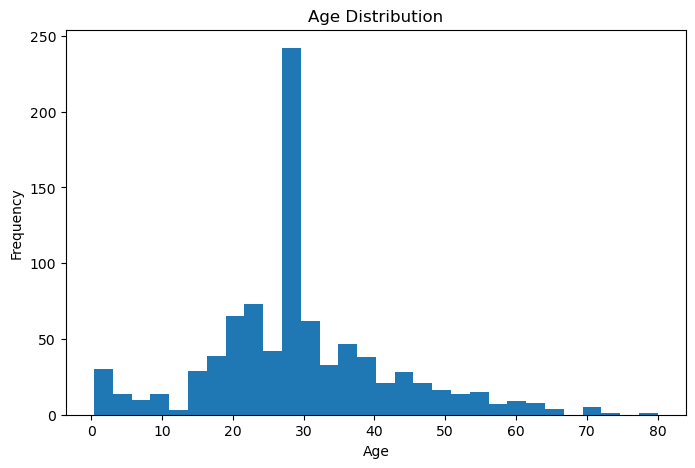

In [89]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
titanic['Age'].plot(kind='hist', bins=30, figsize=(8,5), title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Fare')

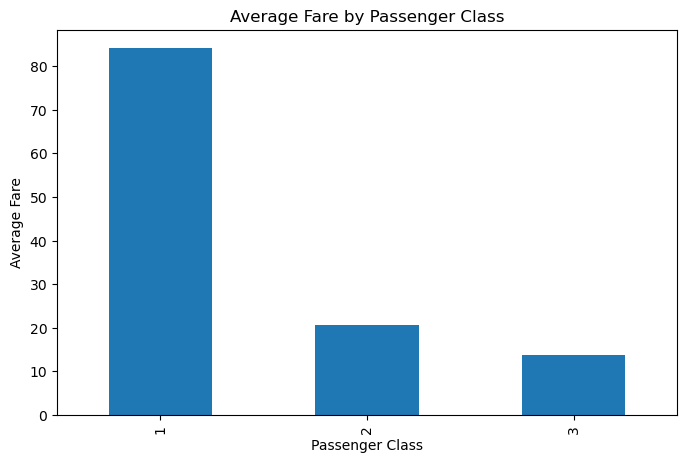

In [90]:
# 43. Plot a bar chart of the average fare by Pclass.
titanic.groupby('Pclass')['Fare'].mean().plot(
    kind='bar',
    title='Average Fare by Passenger Class',
    figsize=(8,5)
)

plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
